In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from dbfread import DBF
import pandas as pd
import numpy as np
from pandas import DataFrame
import shelve

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

## Load 10 years of accident data, from 2007 to 2016

In [2]:
#load accidents data from 2007 to 2016 
dbf07= DBF('accident/accident2007.dbf')
dbf08= DBF('accident/accident2008.dbf')
dbf09= DBF('accident/accident2009.dbf')
dbf10= DBF('accident/accident2010.dbf')
dbf11 = DBF('accident/accident2011.dbf')
dbf12 = DBF('accident/accident2012.dbf')
dbf13 = DBF('accident/accident2013.dbf')
dbf14 = DBF('accident/accident2014.dbf')
dbf15 = DBF('accident/accident2015.dbf')
dbf16 = DBF('accident/accident2016.dbf')
accidents07 = DataFrame(iter(dbf07))
accidents08 = DataFrame(iter(dbf08))
accidents09 = DataFrame(iter(dbf09))
accidents10 = DataFrame(iter(dbf10))
accidents11 = DataFrame(iter(dbf11))
accidents12 = DataFrame(iter(dbf12))
accidents13 = DataFrame(iter(dbf13))
accidents14 = DataFrame(iter(dbf14))
accidents15 = DataFrame(iter(dbf15))
accidents16 = DataFrame(iter(dbf16))

First, we want to combine accidents10 ~ accidents16 to one dataframe. Since not all of the accident data downloaded from the U.S. Department of Transportation have the same features, by using the `jion:inner` option in `pd.concat` function, we can get the intersection of features.

In [3]:
# rename column name in frame07 so that columns names are the same with other frames
accidents07.rename(columns={'latitude': 'LATITUDE', 'longitud': 'LONGITUD'}, inplace=True)

In [4]:
# take a look inside how the accident data file looks like
#combine all accidents file
allaccidents = pd.concat([accidents07,accidents08,accidents09,accidents10,accidents11,accidents12,accidents13,accidents14,accidents15,accidents16], axis=0,join='inner')
pd.set_option('display.max_columns', 100)
allaccidents.head()

,STATE,COUNTY,MONTH,DAY,HOUR,MINUTE,VE_TOTAL,PERSONS,PEDS,NHS,ROUTE,SP_JUR,HARM_EV,MAN_COLL,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,SCH_BUS,CF1,CF2,CF3,FATALS,DAY_WEEK,DRUNK_DR,ST_CASE,CITY,MILEPT,YEAR,TWAY_ID,TWAY_ID2,RAIL,VE_FORMS,WEATHER,LATITUDE,LONGITUD
0,1.0,73.0,1.0,2.0,23.0,15.0,1.0,1.0,0.0,0.0,4.0,0.0,42.0,0.0,4.0,2.0,1.0,0.0,23.0,16.0,23.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,10001.0,0.0,0.0,2007.0,1493,00000000,0000000,1.0,1.0,33.455839,-87.017928
1,1.0,19.0,1.0,30.0,13.0,5.0,3.0,4.0,0.0,0.0,3.0,0.0,12.0,5.0,1.0,1.0,1.0,0.0,13.0,10.0,13.0,11.0,99.0,99.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,10002.0,630.0,0.0,2007.0,SR-68,270,0000000,3.0,1.0,34.160597,-85.678075
2,1.0,9.0,1.0,14.0,12.0,13.0,2.0,5.0,0.0,0.0,2.0,0.0,12.0,7.0,1.0,1.0,1.0,0.0,12.0,16.0,12.0,18.0,99.0,99.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,10003.0,2330.0,0.0,2007.0,US-SR53,00000000,0000000,2.0,1.0,33.975717,-86.496347
3,1.0,15.0,1.0,1.0,15.0,0.0,2.0,2.0,0.0,1.0,2.0,0.0,12.0,4.0,1.0,1.0,1.0,0.0,99.0,99.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,10004.0,0.0,2468.0,2007.0,US-SR1,7260,0000000,2.0,1.0,33.853258,-85.915622
4,1.0,51.0,1.0,6.0,19.0,35.0,2.0,5.0,0.0,0.0,3.0,0.0,12.0,5.0,1.0,3.0,1.0,0.0,19.0,35.0,19.0,41.0,99.0,99.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,10005.0,2063.0,0.0,2007.0,SR-14,I-65,0000000,2.0,1.0,32.488833,-86.408936


The allaccidents table recorded 320874 accidents from 2010-2016, and it has 42 features. Here are the meaning of some of the features according to the `FARS Analytical User’s Manual`.

### Explaination of variables
*VE_TOTAL*: Number of Vehicle in crash <br/>
*VE_FORMS*: Number of Motor Vehicles in Transport (MVIT) <br/>
*PED*: Number of Persons Not in Motor Vehicles <br/>
*NHS*: National Highway System<br/>
*ROUTE*: Route Signing <br/>
*SP_JUR*: Special Jurisdiction <br/>
*HARM_EV*: First Harmful Event<br/>
*TWAY_ID , TWAY_ID2* : Trafficway Identifier <br/>
*MILEPT*: Milepoint <br/>
*SP_JUR*: Special Jurisdiction<br/>
*HARM_EV*: injury or damage producing First Harmful Event <br/> 
*MAN_COLL*:Manner of Collision  <br/> 
*RELJCT1, RELJCT2*: Relation to Junction- Within Interchange Area, Specific Location. <br/>
*TYP_INT*: Type of Intersection <br/>
*REL_ROAD*: Relation to Trafficway <br/>
*LGT_COND*: Light Condition<br/> 
*NOT_HOUR,MIN*: Min, Hour of Notification <br/>
*ARR_HOUR,MIN*: Hour, Min arrival at scene <br/>
*HOSP_HR,MIN*: Hour, Min arrival at hospital <br/>
*CF1, CF2, CF3*:Related Factors- Crash Level, factors related to the crash <br/>
*FATALS*: Fatalities<br/>
*DRUNK_DR*: Number of Drinking Drivers<br/> 
*RAIL*: Rail Grade Crossing Identifier<br/>

For more detailed information, please refer to `FARS Analytical User’s Manual`.

## Select variables and rename variables
Observed from the table above, some of the variables in the table are not very readable. Therefore, in order to make it easier to understand the variables,we renamed some of the variables according to `FARS Analytical User’s Manual`  downloaded from the  `U.S. Department of Transportation`  website. In order to make all column values informative, we selected important column variables from allaccidents, replace numerical number to meaningful character description according to `FARS Analytical User’s Manual`

In [5]:
import warnings
warnings.filterwarnings('ignore')
accidents = allaccidents[['YEAR','ST_CASE','STATE','VE_TOTAL','PERSONS','FATALS','MONTH','DAY_WEEK','HOUR','NHS','LATITUDE','LONGITUD','MAN_COLL','LGT_COND','WEATHER','ARR_HOUR','ARR_MIN','CF1','DRUNK_DR']]
accidents.rename(columns={'ST_CASE':'CASE_NUM','VE_TOTAL':'NUM_VEHICLE','NHS': 'HIGHWAY', 'MAN_COLL': 'COLLISION_TYPE','LGT_COND':'LIGHT_CONDITION','CF1':'CRASH_FACTOR','DRUNK_DR':'DRUNK_DRIVE'}, inplace=True)
accidents['MONTH'] = accidents['MONTH'].map({1.0:'January', 2.0:'February', 3.0: 'March', 4.0:'April', 5.0:'May', 6.0:'June', 7.0:'July', 8.0:'August',9.0: 'September', 10.0:'October', 11.0:'November', 12.0:'December'})
accidents['DAY_WEEK']= accidents['DAY_WEEK'].map({1.0:'Sunday',2.0:'Monday', 3.0:'Tuesday', 4.0: 'Wednesday', 5.0:'Thursday', 6.0:'Friday', 7.0:'Saturday'})
accidents['HIGHWAY'] = accidents['HIGHWAY'].map({1.0:'On',0.0:'Off',9.0:'Unknow'})
accidents['COLLISION_TYPE'] = accidents['COLLISION_TYPE'].map({0.0:'Not Collision',1.0:'Rear-End',2.0:'Head-On',3.0:'Rear-to-Rear',4.0:'Angle',5.0:'Sideswipe, Same Direction',6.0:'Sideswipe, Opposite Direction',7.0:'Sideswipe, Unknown Direction',9.0:'Unknown'})
accidents['LIGHT_CONDITION'] = accidents['LIGHT_CONDITION'].map({1.0:'Daylight',2.0:'Dark' ,3.0:'Dark',5.0:'Dusk',6.0:'Dark',4.0:'Dawn', 7.0:'Other',8.0 :'Not Report', 9.0:'Not Report'})
# accidents['WEATHER'] = accidents['WEATHER'].map({0.0:'Normal',1.0:'Clear',2.0:'Rain',3.0
accidents.head()

,YEAR,CASE_NUM,STATE,NUM_VEHICLE,PERSONS,FATALS,MONTH,DAY_WEEK,HOUR,HIGHWAY,LATITUDE,LONGITUD,COLLISION_TYPE,LIGHT_CONDITION,WEATHER,ARR_HOUR,ARR_MIN,CRASH_FACTOR,DRUNK_DRIVE
0,2007.0,10001.0,1.0,1.0,1.0,1.0,January,Tuesday,23.0,Off,33.455839,-87.017928,Not Collision,Dark,1.0,23.0,20.0,0.0,0.0
1,2007.0,10002.0,1.0,3.0,4.0,2.0,January,Tuesday,13.0,Off,34.160597,-85.678075,"Sideswipe, Same Direction",Daylight,1.0,13.0,11.0,0.0,0.0
2,2007.0,10003.0,1.0,2.0,5.0,1.0,January,Sunday,12.0,Off,33.975717,-86.496347,"Sideswipe, Unknown Direction",Daylight,1.0,12.0,18.0,0.0,0.0
3,2007.0,10004.0,1.0,2.0,2.0,1.0,January,Monday,15.0,On,33.853258,-85.915622,Angle,Daylight,1.0,15.0,5.0,0.0,0.0
4,2007.0,10005.0,1.0,2.0,5.0,1.0,January,Saturday,19.0,Off,32.488833,-86.408936,"Sideswipe, Same Direction",Dark,1.0,19.0,41.0,0.0,0.0


combine "year" and "case_num" to reindex accidents dataframe.

In [6]:
accidents['STATE']=accidents['STATE'].astype(int)
accidents['CASE_NUM']=accidents['CASE_NUM'].astype(int)
accidents['YEAR']=accidents['YEAR'].astype(int)
accidents.index = list(accidents['YEAR'].astype(str) + accidents['CASE_NUM'].astype(str))
accidents.head()

,YEAR,CASE_NUM,STATE,NUM_VEHICLE,PERSONS,FATALS,MONTH,DAY_WEEK,HOUR,HIGHWAY,LATITUDE,LONGITUD,COLLISION_TYPE,LIGHT_CONDITION,WEATHER,ARR_HOUR,ARR_MIN,CRASH_FACTOR,DRUNK_DRIVE
200710001,2007,10001,1,1.0,1.0,1.0,January,Tuesday,23.0,Off,33.455839,-87.017928,Not Collision,Dark,1.0,23.0,20.0,0.0,0.0
200710002,2007,10002,1,3.0,4.0,2.0,January,Tuesday,13.0,Off,34.160597,-85.678075,"Sideswipe, Same Direction",Daylight,1.0,13.0,11.0,0.0,0.0
200710003,2007,10003,1,2.0,5.0,1.0,January,Sunday,12.0,Off,33.975717,-86.496347,"Sideswipe, Unknown Direction",Daylight,1.0,12.0,18.0,0.0,0.0
200710004,2007,10004,1,2.0,2.0,1.0,January,Monday,15.0,On,33.853258,-85.915622,Angle,Daylight,1.0,15.0,5.0,0.0,0.0
200710005,2007,10005,1,2.0,5.0,1.0,January,Saturday,19.0,Off,32.488833,-86.408936,"Sideswipe, Same Direction",Dark,1.0,19.0,41.0,0.0,0.0


In [7]:
accidents.shape

(320874, 19)

### Load vehicle data file which contains mortality rate

We also want to study the mortality rate of fatal accidents. The data element “Fatalities in Vehicle” in the Vehicle data file from the `U.S. Department of Transportation` website provides the number of deaths in a vehicle.

In [8]:
vdbf07= DBF('vehicle_deaths/vehicle2007.dbf')
vdbf08= DBF('vehicle_deaths/vehicle2008.dbf')
vdbf09= DBF('vehicle_deaths/vehicle2009.dbf')
vdbf10= DBF('vehicle_deaths/vehicle2010.dbf')
vdbf11= DBF('vehicle_deaths/vehicle2011.dbf')
vdbf12= DBF('vehicle_deaths/vehicle2012.dbf')
vdbf13= DBF('vehicle_deaths/vehicle2013.dbf')
vdbf14= DBF('vehicle_deaths/vehicle2014.dbf')
# vdbf15= DBF('vehicle_deaths/vehicle2015.csv')
vdbf16= DBF('vehicle_deaths/vehicle2016.dbf')
vehicle07 = DataFrame(iter(vdbf07))
vehicle08 = DataFrame(iter(vdbf08))
vehicle09 = DataFrame(iter(vdbf09))
vehicle10 = DataFrame(iter(vdbf10))
vehicle11 = DataFrame(iter(vdbf11))
vehicle12 = DataFrame(iter(vdbf12))
vehicle13 = DataFrame(iter(vdbf13))
vehicle14 = DataFrame(iter(vdbf14))
# vehicle15 = pd.read_csv('vehicle_deaths/vehicle2015.csv')
vehicle16 = DataFrame(iter(vdbf16))

In [9]:
vehicle07['YEAR']=2007
vehicle08['YEAR']=2008
vehicle09['YEAR']=2009
vehicle10['YEAR']=2010
vehicle11['YEAR']=2011
vehicle12['YEAR']=2012
vehicle13['YEAR']=2013
vehicle14['YEAR']=2014
# vehicle15['YEAR']='2015.0'
vehicle16['YEAR']=2016

In [10]:
allvehicles=pd.concat([vehicle07,vehicle08,vehicle09,vehicle10,vehicle11,vehicle12,vehicle13,vehicle14,vehicle16], axis=0,join='outer')
vehicles = allvehicles[['STATE','YEAR','ST_CASE','HIT_RUN','TRAV_SP','ROLLOVER','FIRE_EXP','SPEEDREL','DEATHS','BODY_TYP','DR_DRINK']]
vehicles.rename(columns={'ST_CASE':'CASE_NUM','TRAV_SP':'SPEED','FIRE_EXP': 'FIRE','SPEEDREL':'SPEEDING'}, inplace=True)
vehicles['STATE']=vehicles['STATE'].astype(int)
vehicles['CASE_NUM']=vehicles['CASE_NUM'].astype(int)
vehicles['YEAR']=vehicles['YEAR'].astype(int)
vehicles.index = list(vehicles['YEAR'].astype(str) + vehicles['CASE_NUM'].astype(str))
vehicles.head()

,STATE,YEAR,CASE_NUM,HIT_RUN,SPEED,ROLLOVER,FIRE,SPEEDING,DEATHS,BODY_TYP,DR_DRINK
200710001,1,2007,10001,0.0,65.0,0.0,0.0,NaN,1.0,4.0,0.0
200710002,1,2007,10002,0.0,10.0,0.0,0.0,NaN,0.0,4.0,0.0
200710002,1,2007,10002,0.0,55.0,0.0,0.0,NaN,2.0,4.0,0.0
200710002,1,2007,10002,0.0,55.0,0.0,0.0,NaN,0.0,31.0,0.0
200710003,1,2007,10003,1.0,55.0,0.0,0.0,NaN,0.0,15.0,0.0


In [11]:
acci_vehi = pd.merge(vehicles, accidents, left_index=True, right_index=True, how='inner',on=('STATE', 'YEAR','CASE_NUM'))
acci_vehi.index=(acci_vehi.index).astype(int)
acci_vehi.sort_index()
acci_vehi.head()

,STATE,YEAR,CASE_NUM,HIT_RUN,SPEED,ROLLOVER,FIRE,SPEEDING,DEATHS,BODY_TYP,DR_DRINK,NUM_VEHICLE,PERSONS,FATALS,MONTH,DAY_WEEK,HOUR,HIGHWAY,LATITUDE,LONGITUD,COLLISION_TYPE,LIGHT_CONDITION,WEATHER,ARR_HOUR,ARR_MIN,CRASH_FACTOR,DRUNK_DRIVE
2007100001,10,2007,100001,0.0,99.0,0.0,0.0,NaN,1.0,14.0,0.0,1.0,1.0,1.0,January,Tuesday,20.0,Off,38.645422,-75.210097,Not Collision,Dark,1.0,21.0,2.0,0.0,0.0
2007100002,10,2007,100002,0.0,50.0,0.0,0.0,NaN,0.0,4.0,0.0,2.0,3.0,1.0,January,Wednesday,18.0,Off,38.973942,-75.452531,Not Collision,Dark,1.0,18.0,29.0,0.0,0.0
2007100002,10,2007,100002,0.0,50.0,0.0,0.0,NaN,0.0,31.0,0.0,2.0,3.0,1.0,January,Wednesday,18.0,Off,38.973942,-75.452531,Not Collision,Dark,1.0,18.0,29.0,0.0,0.0
2007100003,10,2007,100003,0.0,45.0,0.0,0.0,NaN,0.0,4.0,0.0,1.0,2.0,1.0,January,Thursday,10.0,Off,39.733614,-75.638883,Not Collision,Daylight,1.0,10.0,5.0,0.0,0.0
2007100004,10,2007,100004,2.0,30.0,0.0,0.0,NaN,0.0,2.0,0.0,1.0,2.0,1.0,January,Sunday,11.0,Off,39.734878,-75.574147,Not Collision,Daylight,1.0,11.0,57.0,0.0,0.0


### plot 

In [12]:
#the total accidents number each year, analysis the difference between every year
year_acci=acci_vehi[['YEAR','CASE_NUM']].groupby('YEAR').count()
month_acci=acci_vehi[['MONTH','CASE_NUM']].groupby('MONTH').count()
day_acci=acci_vehi[['DAY_WEEK','CASE_NUM']].groupby('DAY_WEEK').count()
hour_acci=acci_vehi[['HOUR','CASE_NUM']].groupby('HOUR').count()
hour_acci=hour_acci.drop(hour_acci.index[-1])
hour_acci.iloc[0]=hour_acci.iloc[0]+hour_acci.iloc[-1]
hour_acci=hour_acci.drop(hour_acci.index[-1])
day_acci.index = pd.CategoricalIndex(day_acci.index, 
                               categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday', 'Sunday'], 
                               sorted=True)
day_acci = day_acci.sort_index()
month_acci.index=pd.CategoricalIndex(month_acci.index, 
                               categories=['January', 'February', 'March', 'April','May','June', 'July','August','September','October','November','December'], 
                               sorted=True)
month_acci=month_acci.sort_index()

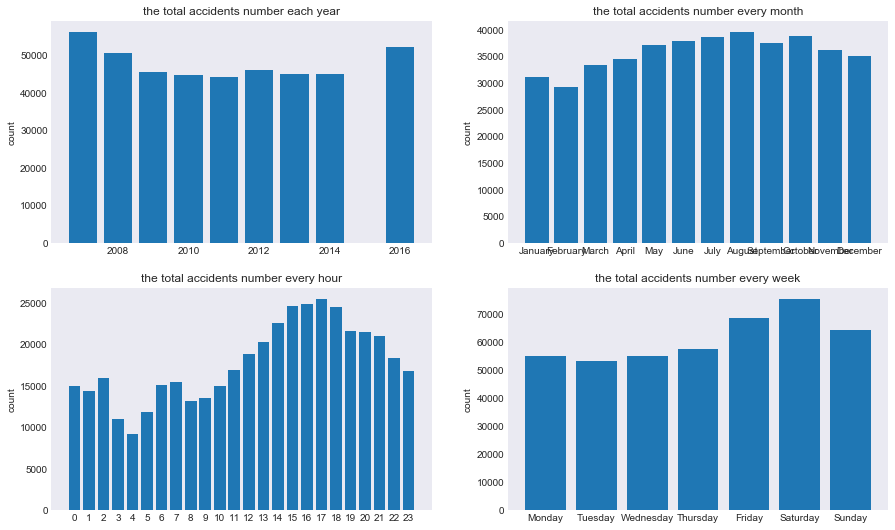

In [13]:
import matplotlib.pyplot as plt
f1,axarr = plt.subplots(2,2)
f1.set_figwidth(15)
f1.set_figheight(9)

axarr[0,0].set_ylabel("count")
axarr[0,0].set_title("the total accidents number each year")
axarr[0,0].bar(year_acci.index,year_acci['CASE_NUM'])


objects1=np.array(month_acci.index)
x1=np.arange(len(objects1))
axarr[0,1].set_ylabel("count")
axarr[0,1].set_title("the total accidents number every month")
axarr[0,1].bar(x1,month_acci['CASE_NUM'])
axarr[0,1].set_xticks(x1)
axarr[0,1].set_xticklabels(objects1)

axarr[1,0].set_ylabel("count")
axarr[1,0].set_title("the total accidents number every hour")
axarr[1,0].bar(hour_acci.index,hour_acci['CASE_NUM'])
axarr[1,0].set_xticks(np.arange(0,24))

objects2=np.array(day_acci.index)
x2=np.arange(len(objects2))
axarr[1,1].set_ylabel("count")
axarr[1,1].set_title("the total accidents number every week")
axarr[1,1].bar(x2,day_acci['CASE_NUM'])
axarr[1,1].set_xticks(x2)
axarr[1,1].set_xticklabels(objects2)
f1.savefig("fig/time_relate_count.png")

In [14]:
acci_vehi.to_hdf('results/df1.h5', 'acci_vehi')

#with shelve.open('results/vars2') as db:
    #db['speech_words'] = speech_words
    #db['speeches_cleaned'] = speeches_cleaned